# Procesamiento y análisis de datos (EDA)

- Nuestro objetivo es lograr un modelo capaz de devolvernos un precio dependiento del tipo de habitacion que yo quiera en el lugar que elija.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder
import pickle
from sklearn.feature_selection import f_classif, SelectKBest

In [3]:
df = pd.read_csv('/workspaces/GuilloMansa-MachineLearning/data/raw/internal-link.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [4]:
df.shape, df.info

((48895, 16),
 <bound method DataFrame.info of              id                                               name   host_id  \
 0          2539                 Clean & quiet apt home by the park      2787   
 1          2595                              Skylit Midtown Castle      2845   
 2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
 3          3831                    Cozy Entire Floor of Brownstone      4869   
 4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
 ...         ...                                                ...       ...   
 48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
 48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
 48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
 48893  36485609               43rd St. Time Square-cozy single bed  30985759   
 48894  36487245  Trendy duplex in the very heart of Hell's Kit

In [5]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
id,48895.0,19017143.24,10983108.39,2539.00,9471945.00,19677284.00,2.915218e+07,3.648724e+07
host_id,48895.0,67620010.65,78610967.03,2438.00,7822033.00,30793816.00,1.074344e+08,2.743213e+08
latitude,48895.0,40.73,0.05,40.50,40.69,40.72,4.076000e+01,4.091000e+01
longitude,48895.0,-73.95,0.05,-74.24,-73.98,-73.96,-7.394000e+01,-7.371000e+01
price,48895.0,152.72,240.15,0.00,69.00,106.00,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.03,20.51,1.00,1.00,3.00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,23.27,44.55,0.00,1.00,5.00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.37,1.68,0.01,0.19,0.72,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.14,32.95,1.00,1.00,1.00,2.000000e+00,3.270000e+02
availability_365,48895.0,112.78,131.62,0.00,0.00,45.00,2.270000e+02,3.650000e+02


In [6]:
price_stats = df['price'].describe().round(2)
price_stats

count    48895.00
mean       152.72
std        240.15
min          0.00
25%         69.00
50%        106.00
75%        175.00
max      10000.00
Name: price, dtype: float64

In [7]:
df.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
48890    False
48891    False
48892    False
48893    False
48894    False
Length: 48895, dtype: bool

In [8]:
df[df.duplicated(keep=False)]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365


In [9]:
df = df.drop_duplicates()

In [10]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

### **Observaciones:**
####
> - Vemos que el dataset cuenta con 48895 filas por 16 columnas
> - No existen columnas duplicadas
> - Se detectan valores null en nuestras columnas 'last_review', 'reviews_per_month', 'name' y 'host_name'.
> - Vemos que respecto a los precios la media es de 152 usd, su desviacion estandar es de 240 y hay minimos de 69 usd y maximos de 10.000usd. Nos da idea de la dispersion y de que posiblemente hay valores erróneos o atípicos.

#### Conclusiones de las observaciones de cara a nuestro objetivo:
- Consideramos que las columnas que contienen los datos del hospedaje ['name'], el id y el nombre del host ['host_id','host_name'] son datos que son irrelevantes para nuestro objetivo.


In [11]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [12]:
num_distintos = df['neighbourhood'].nunique()
num_distintos_group = df['neighbourhood_group'].nunique()
num_distintos_room = df['room_type'].nunique()
num_distintos,num_distintos_group, num_distintos_room

(221, 5, 3)

In [13]:
df.drop(['name', 'host_id', 'host_name','id'], axis=1, inplace=True)
df

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
48890,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [14]:
df = df.drop(df[(df['price'] == 0) | (df['price'] > 2000)].index)

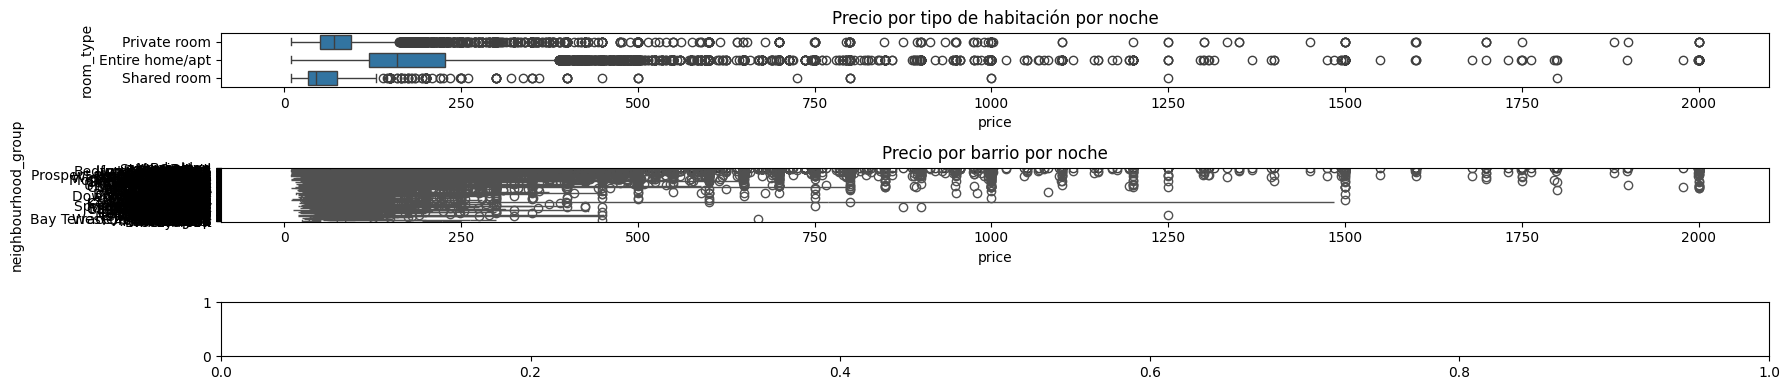

In [15]:
fig, axes = plt.subplots(3, 1, figsize=(18, 4))

sns.boxplot(x="price", y="room_type", data=df, ax=axes[0])
axes[0].set_title("Precio por tipo de habitación por noche")

sns.boxplot(x="price", y="neighbourhood_group", data=df, ax=axes[1])
axes[1].set_title("Precio por region por noche")

sns.boxplot(x="price", y="neighbourhood", data=df, ax=axes[1])
axes[1].set_title("Precio por barrio por noche")

plt.tight_layout()
plt.show()

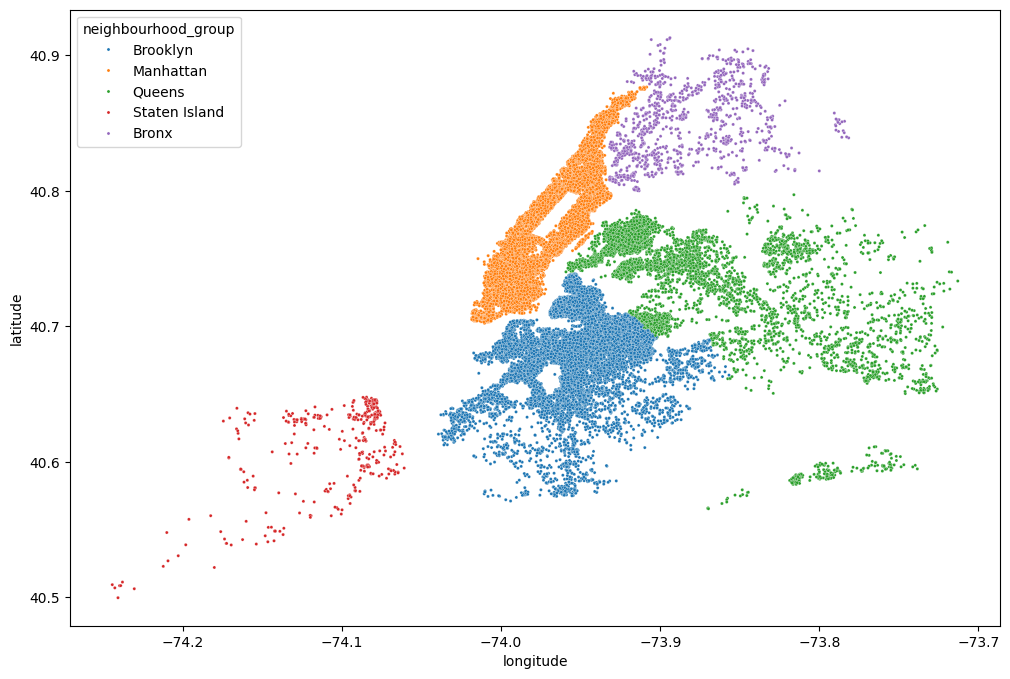

In [16]:
plt.figure (figsize=(12,8))
sns.scatterplot(data=df, x='longitude', y='latitude',hue='neighbourhood_group', s=5)
plt.show()

In [17]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Mapa")
plt.show()

ValueError: could not convert string to float: 'Brooklyn'